In [12]:
# csvを読み込み
with open('toyonaka.csv', 'rt', encoding='Shift_JIS') as f:
    lines = f.readlines()

# ファイルを整形する
lines = ['年,月,日,気温,品質,均質\n'] + lines[5:]
lines = map(lambda v: v.replace('/', ','), lines)
ret = ''.join(lines).strip()
print(len(ret))

# 出力
with open('toyonaka_10y.csv', 'wt', encoding='utf-8') as f:
    f.write(ret)

68136


In [15]:
import pandas as pd

# csv読み込み
csv = pd.read_csv('toyonaka_10y.csv', encoding='utf-8')

In [16]:
# リスト化
md = {}
for i, row in csv.iterrows():
    m, d, v = (int(row['月']), int(row['日']), int(row['気温']))
    key = f'{m}/{d}'
    if not (key in md):
        md[key] = []
    md[key].append(v)

# 平均
ave = {}
for key in md:
    ave[key] = sum(md[key]) / len(md[key])
    print(f'{key}: {ave[key]}')

1/1: 4.4
1/2: 4.7
1/3: 4.5
1/4: 4.8
1/5: 4.8
1/6: 4.9
1/7: 4.1
1/8: 4.9
1/9: 5.1
1/10: 4.2
1/11: 4.2
1/12: 3.6
1/13: 3.6
1/14: 3.2
1/15: 3.7
1/16: 3.8
1/17: 4.5
1/18: 4.5
1/19: 4.3
1/20: 5.1
1/21: 5.0
1/22: 4.9
1/23: 4.2
1/24: 3.0
1/25: 3.5
1/26: 3.0
1/27: 3.7
1/28: 4.0
1/29: 4.3
1/30: 4.5
1/31: 4.1
2/1: 4.2
2/2: 5.4
2/3: 5.0
2/4: 4.8
2/5: 4.4
2/6: 4.4
2/7: 4.5
2/8: 3.8
2/9: 4.3
2/10: 4.1
2/11: 3.7
2/12: 4.0
2/13: 4.4
2/14: 5.0
2/15: 4.6
2/16: 4.6
2/17: 4.8
2/18: 4.5
2/19: 4.6
2/20: 5.7
2/21: 5.0
2/22: 6.4
2/23: 8.0
2/24: 7.0
2/25: 7.6
2/26: 7.4
2/27: 7.6
2/28: 8.1
3/1: 8.0
3/2: 7.4
3/3: 6.7
3/4: 8.1
3/5: 9.4
3/6: 8.9
3/7: 8.2
3/8: 8.2
3/9: 7.1
3/10: 5.9
3/11: 5.3
3/12: 7.1
3/13: 8.9
3/14: 7.8
3/15: 8.4
3/16: 8.4
3/17: 8.8
3/18: 10.7
3/19: 11.4
3/20: 11.2
3/21: 9.6
3/22: 9.0
3/23: 8.4
3/24: 8.3
3/25: 8.4
3/26: 8.1
3/27: 9.5
3/28: 11.1
3/29: 11.1
3/30: 11.8
3/31: 11.4
4/1: 11.6
4/2: 12.5
4/3: 12.4
4/4: 12.4
4/5: 12.9
4/6: 13.2
4/7: 11.8
4/8: 11.8
4/9: 13.3
4/10: 13.3
4/11: 12.2
4/12: 12

In [19]:
ave['9/2']

26.4

月
1      4.673871
2      5.750000
3      9.237419
4     14.513667
5     19.765806
6     23.374000
7     27.747419
8     29.031935
9     24.703333
10    19.080645
11    12.777000
12     7.315161
Name: 気温, dtype: float64


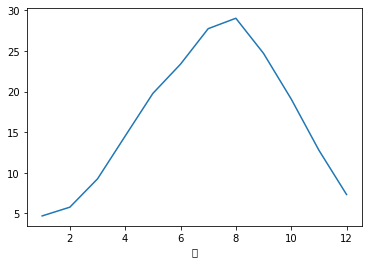

In [23]:
import matplotlib.pyplot as plt

# 月ごとの平均
g = csv.groupby(['月'])['気温']
gg = g.sum() / g.count()
print(gg)
gg.plot()
plt.show()

年
2010    30
2011     9
2012    10
2013    19
2014     3
2015    12
2016     6
2017    13
2018    25
2019    20
Name: 年, dtype: int64


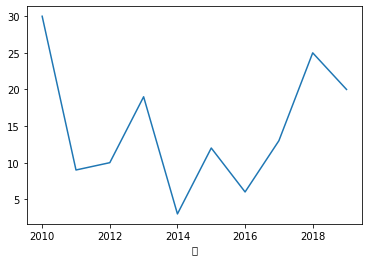

In [24]:
# 30度超えの日
over = csv[(csv['気温'] > 30)]

# 年ごと
cnt = over.groupby(['年'])['年'].count()
print(cnt)
cnt.plot()
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 学習用とテストに分離
train_year = (csv['年'] <= 2018)
test_year = (csv['年'] >= 2019)
interval = 6
print(train_year)
print(test_year)

0        True
1        True
2        True
3        True
4        True
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: 年, Length: 3652, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
3647     True
3648     True
3649     True
3650     True
3651     True
Name: 年, Length: 3652, dtype: bool


In [38]:
# 過去６日間を学習
def make_data(data):
    x = []
    y = []
    temps = list(data['気温'])
    for i in range(len(temps)):
        if i < interval:
            continue
        y.append(temps[i])
        
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(csv[train_year])
test_x, test_y = make_data(csv[test_year])
print(f'train: {len(train_x)}, {len(train_y)}')
print(f'test: {len(test_x)}, {len(test_y)}')

train: 3281, 3281
test: 359, 359


In [39]:
# 直線回避分析
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
pre_y = lr.predict(test_x)

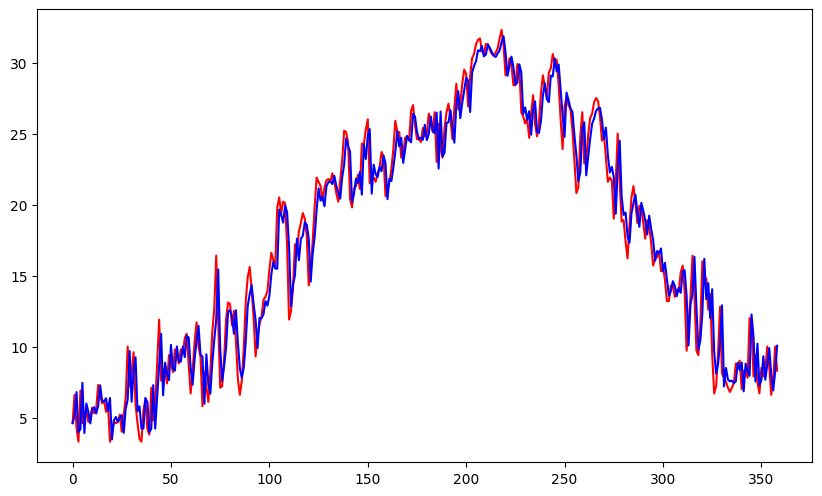

In [29]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.show()

In [41]:
pre_y - test_y

array([ 9.95122994e-03, -1.52787864e+00,  2.49185208e+00,  6.69124604e-01,
       -2.70969760e+00,  2.84497578e+00, -1.39009918e+00,  4.85216225e-01,
        7.14234382e-01, -5.08641386e-01, -9.90247066e-02,  4.27187471e-01,
       -3.11970325e-01, -1.49291919e+00,  6.69763642e-01,  1.81835631e-01,
       -8.69862694e-02,  9.56709683e-01, -4.38542372e-01,  3.07768460e+00,
       -4.40828277e-01,  1.05881956e-01,  4.38604056e-01, -4.24790275e-03,
       -2.28946984e-01,  1.16701601e+00, -1.27538493e+00, -7.83297910e-01,
       -3.72911122e+00,  2.47743447e+00, -1.98854123e+00, -1.33321491e+00,
        3.34365493e+00,  8.34590210e-01,  2.29040768e+00,  9.38684401e-01,
       -1.27406550e+00,  8.04395250e-02,  1.89226220e+00,  1.72617174e-01,
       -2.88928972e+00,  2.48345658e+00, -1.68320209e+00, -2.37443686e+00,
       -3.26440642e+00,  3.29018568e+00, -1.83214776e+00,  5.65947865e-01,
        6.63411358e-01, -1.76996590e+00,  1.21572859e+00,  2.68101444e-01,
       -1.49961448e+00,  

In [42]:
diff_y = abs(pre_y - test_y)
print(f'average = {sum(diff_y) / len(diff_y)}')
print(f'max = {max(diff_y)}')

average = 1.2441087437121416
max = 5.169340831617143
